In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/diamonds/diamonds.csv', index_col=0)

                                             |          | [  0%]   00:00 -> (? left)


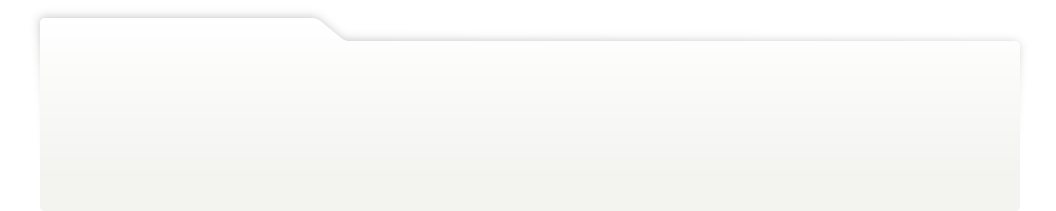
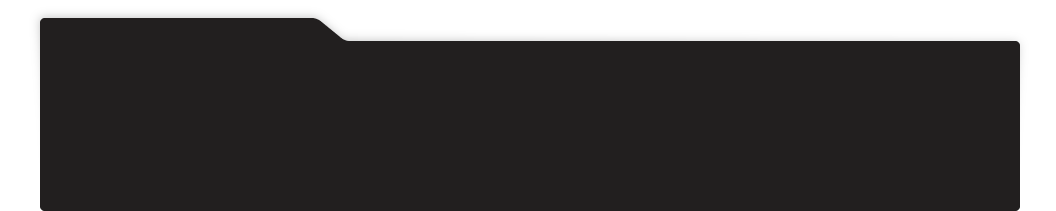
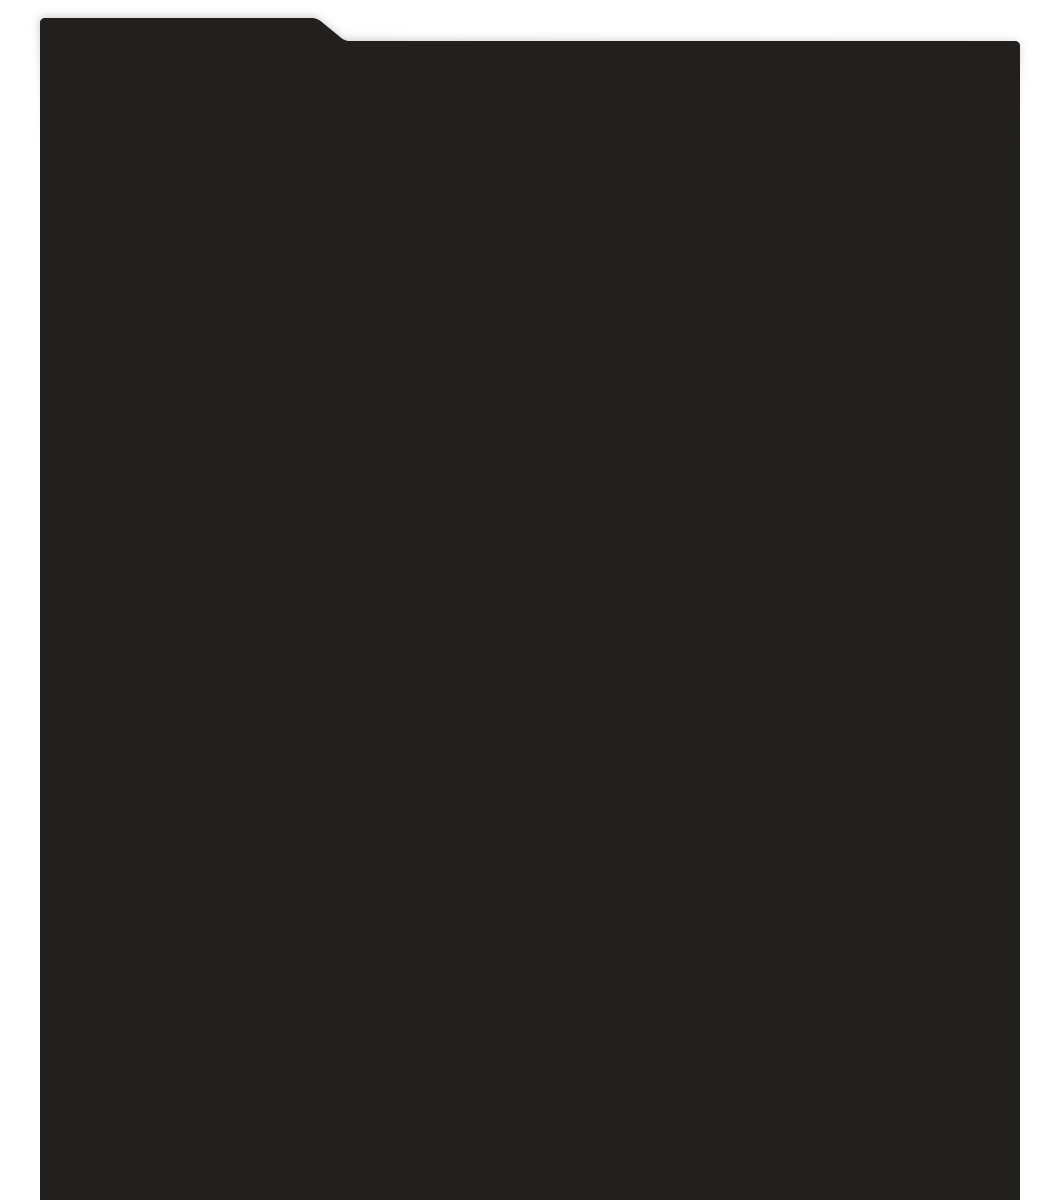
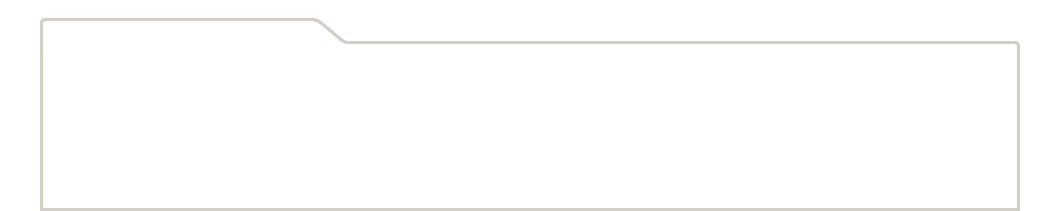
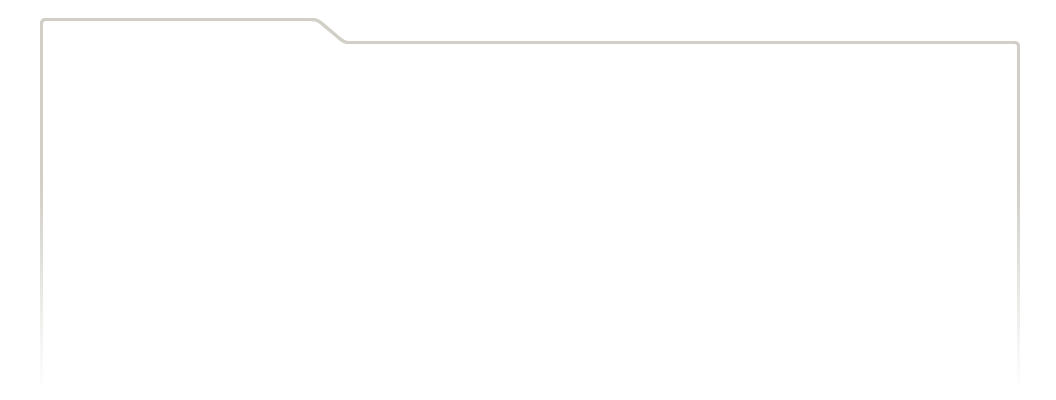
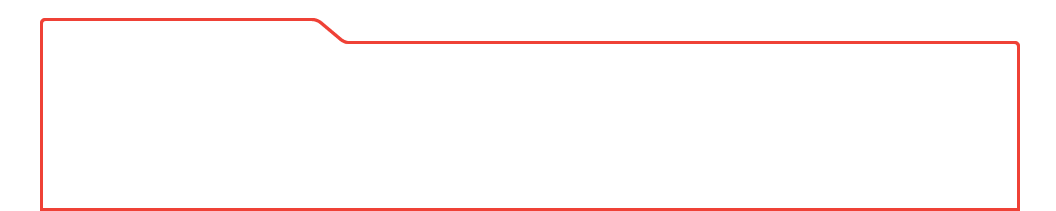
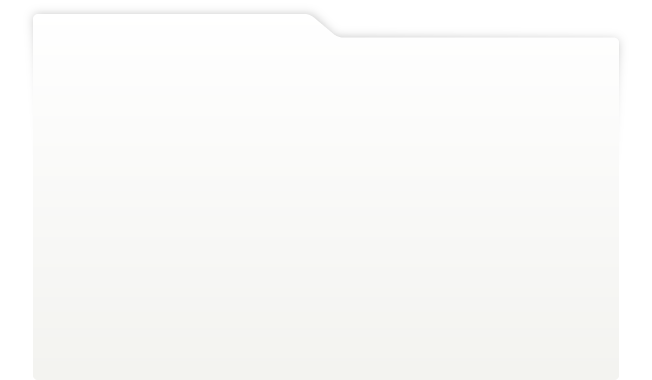
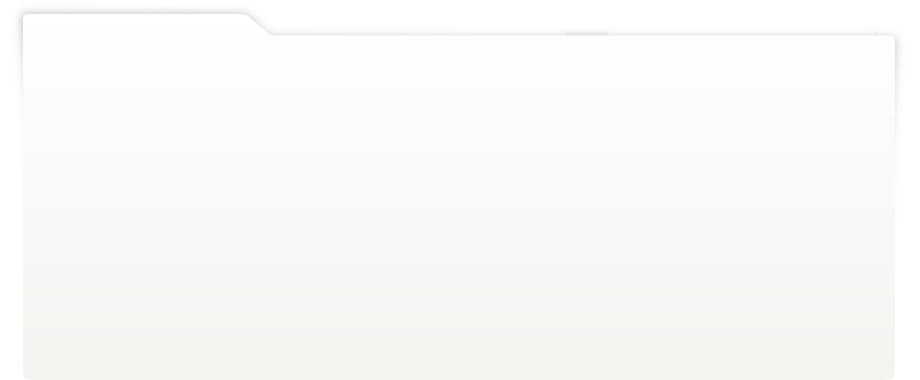
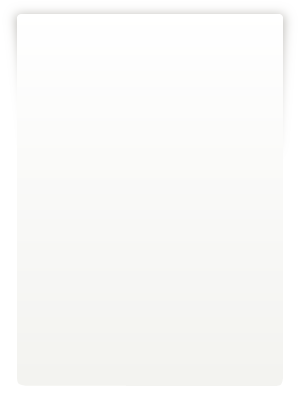
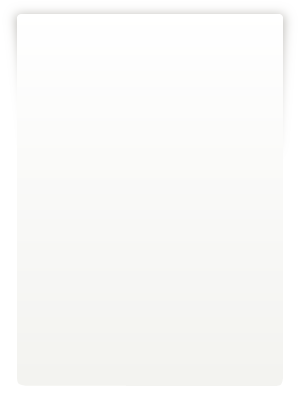
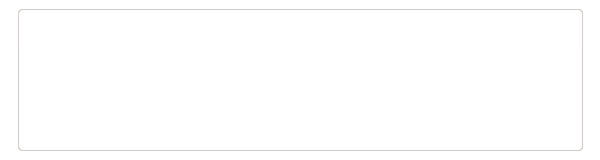
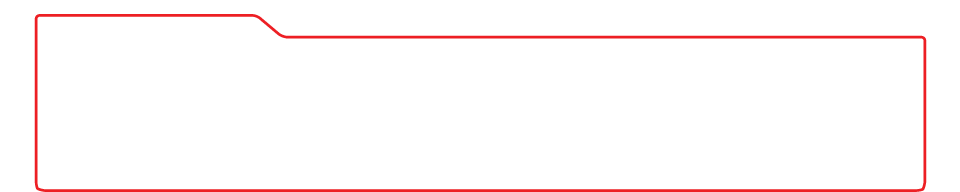
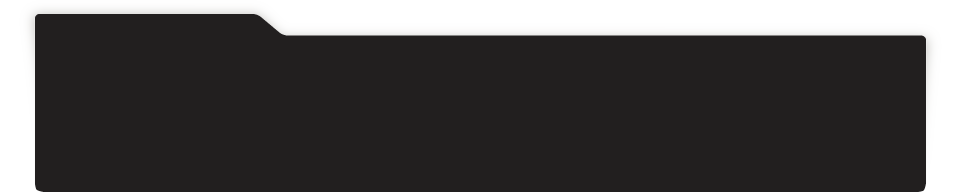
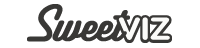
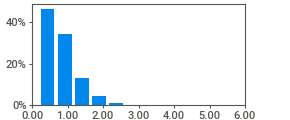
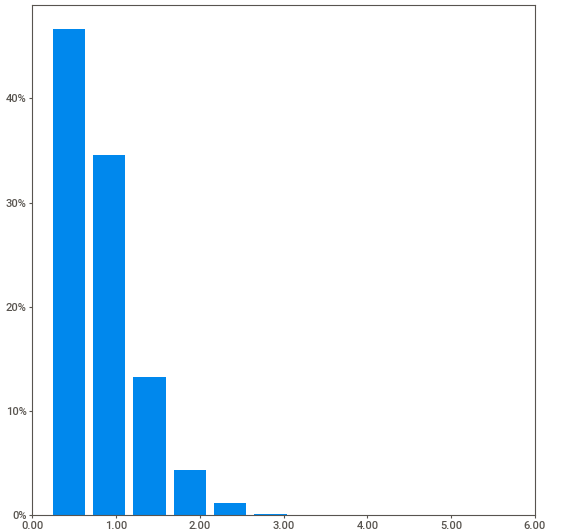
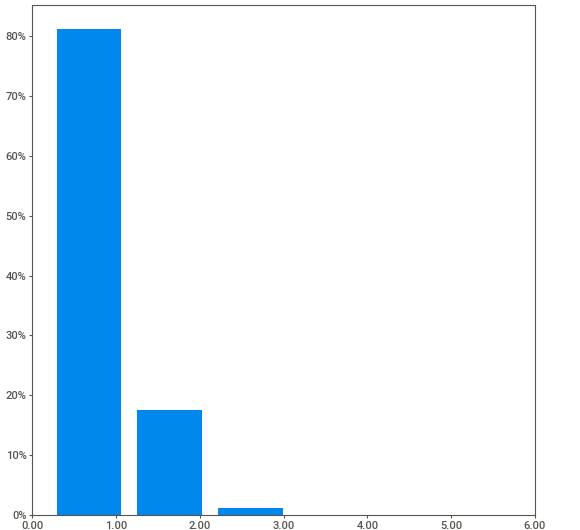
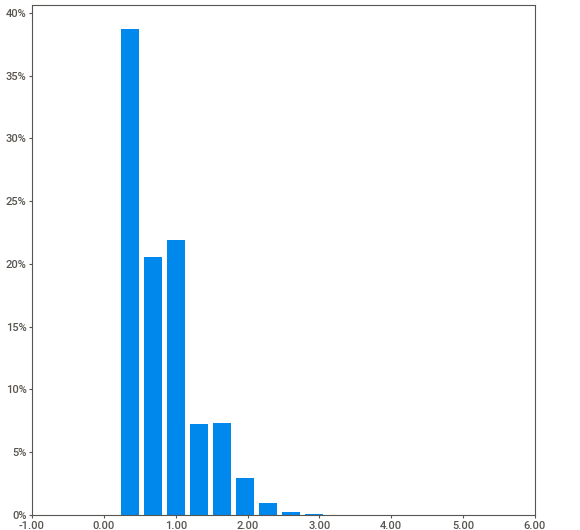
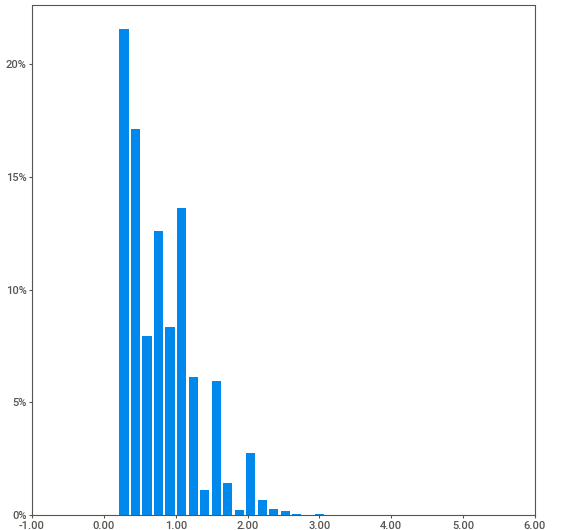
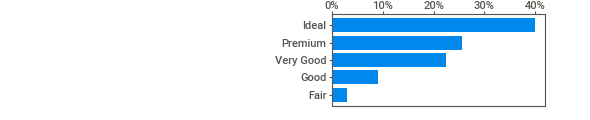
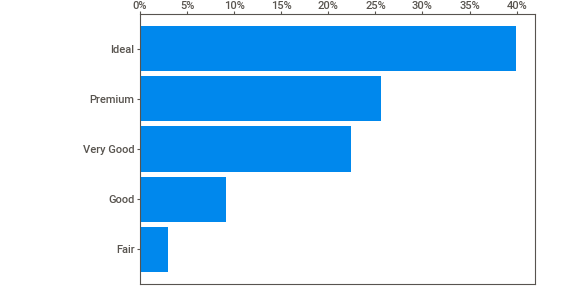
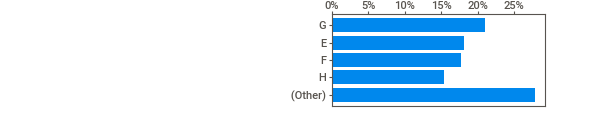
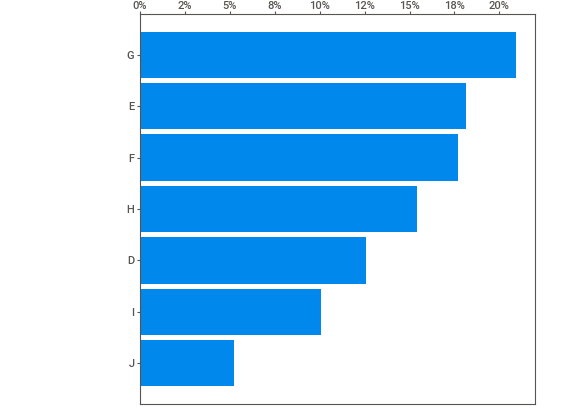
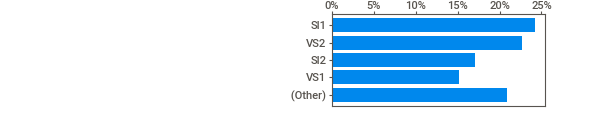
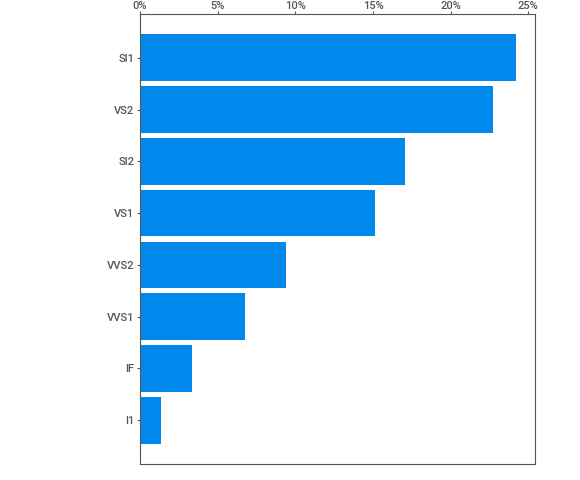
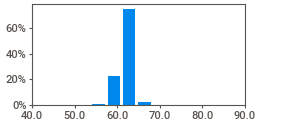
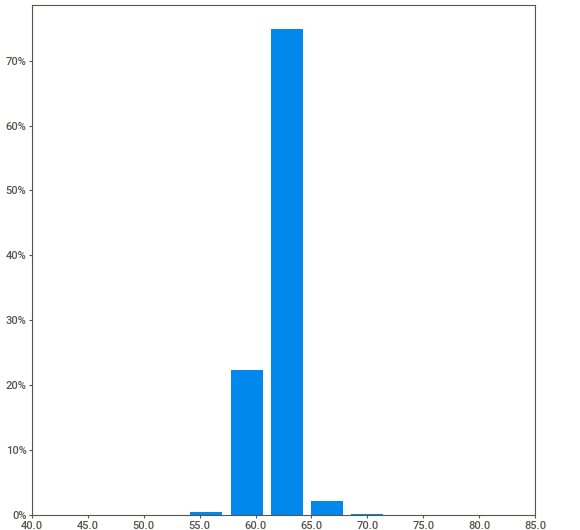
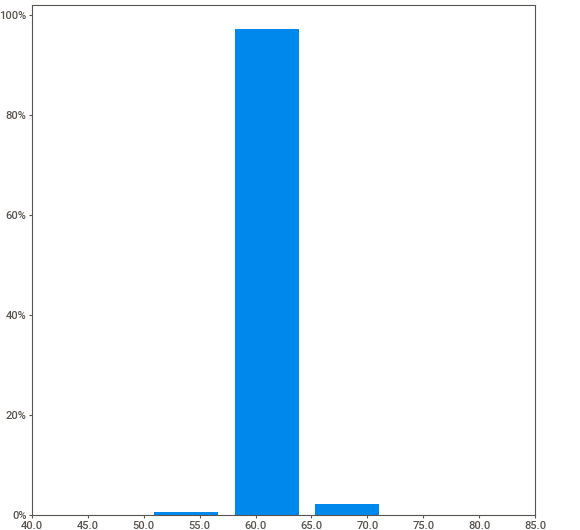
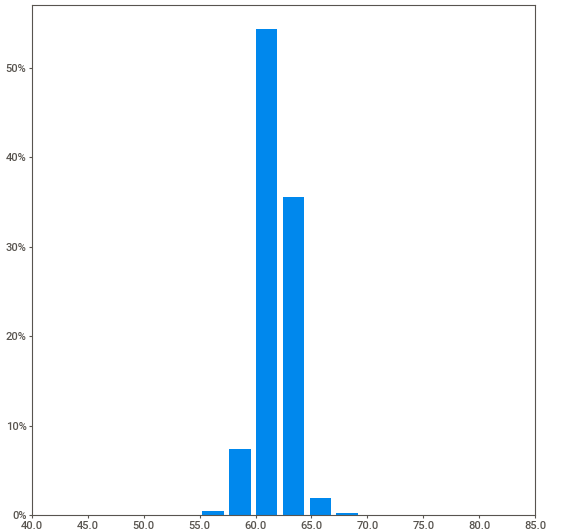
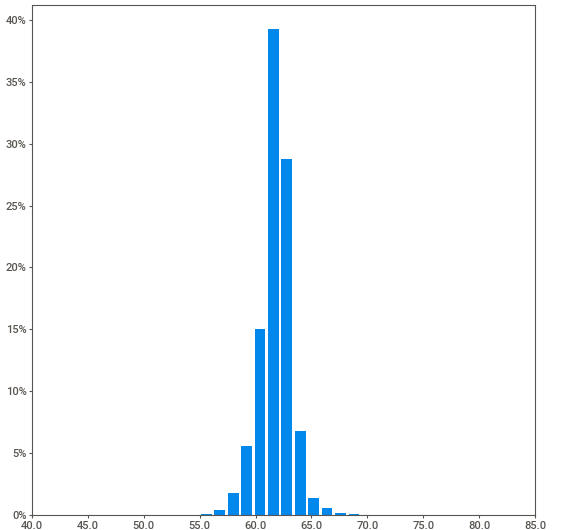
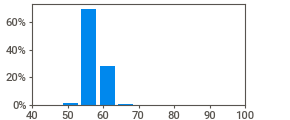
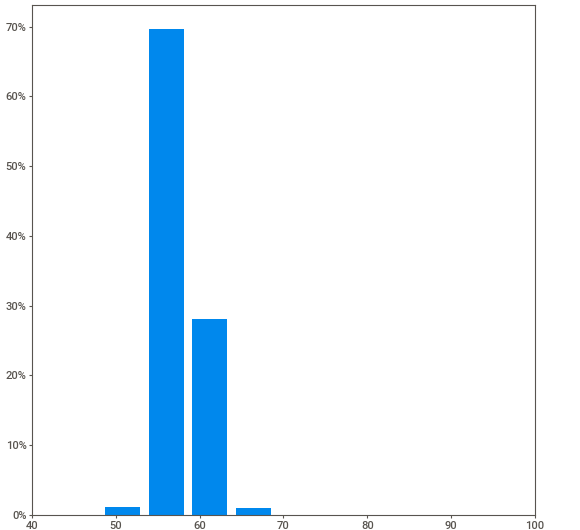
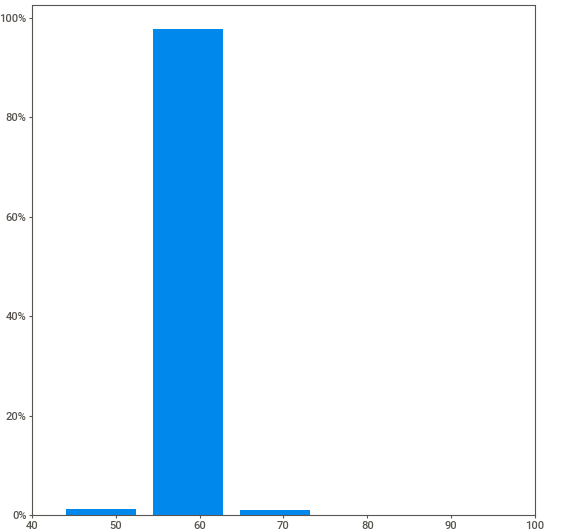
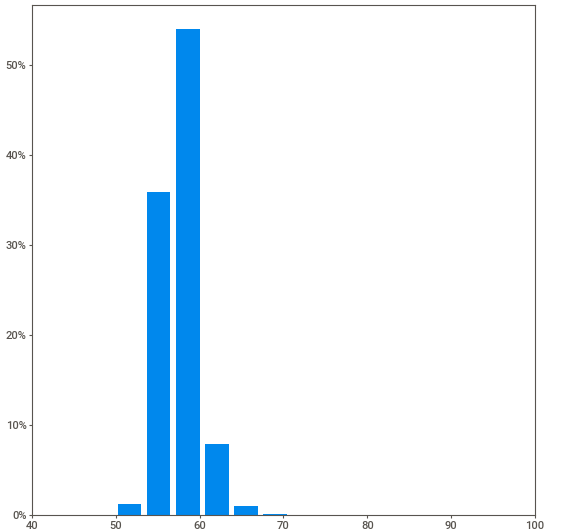
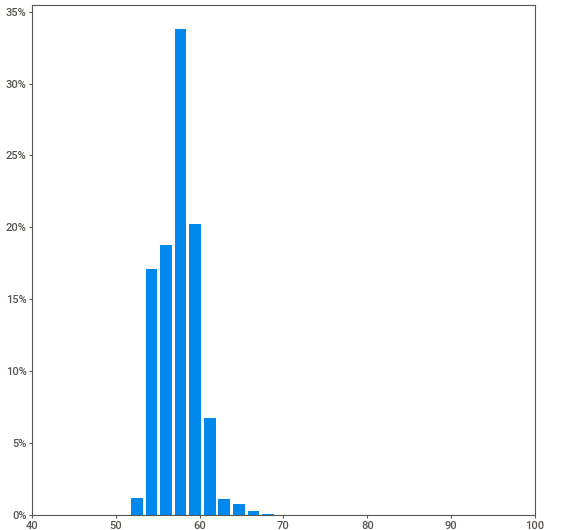
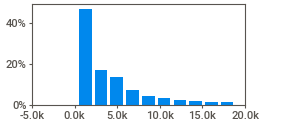
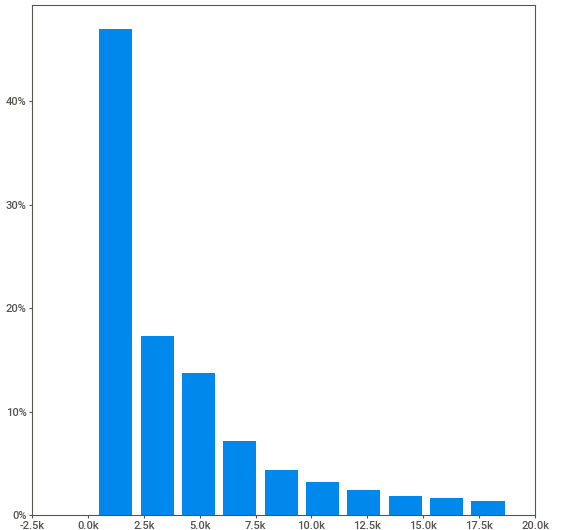
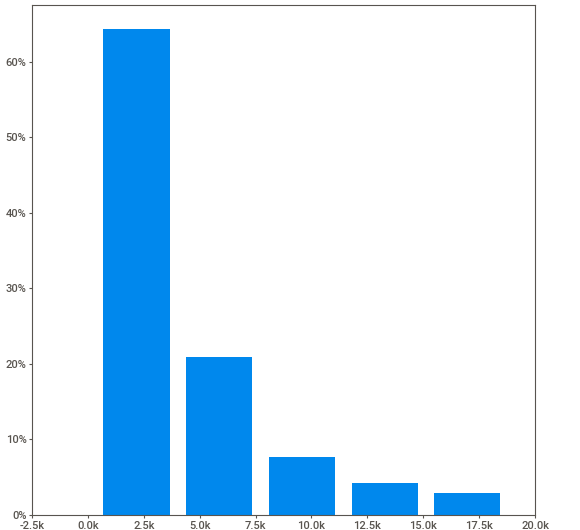
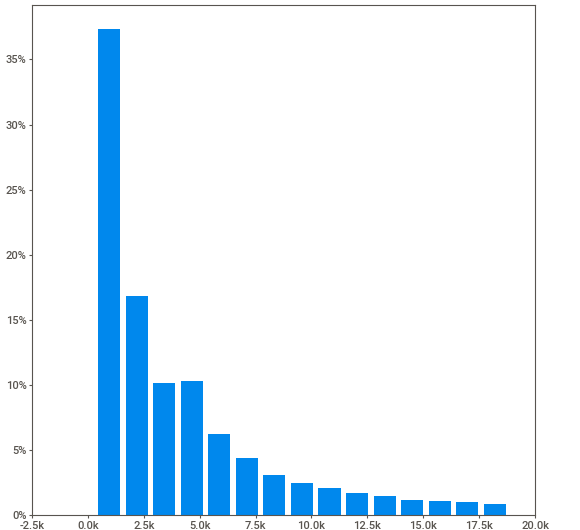
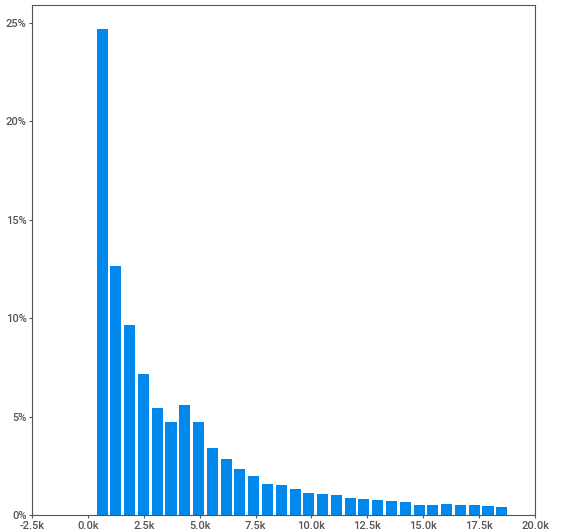
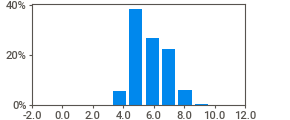
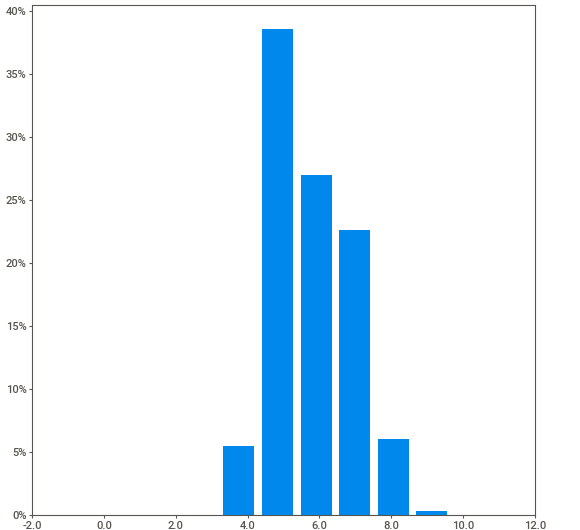
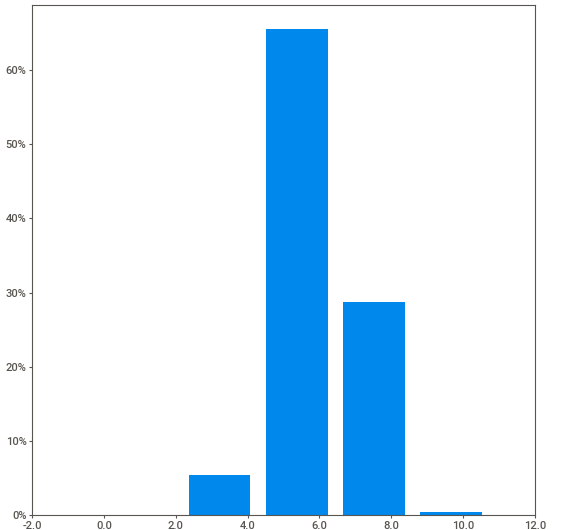
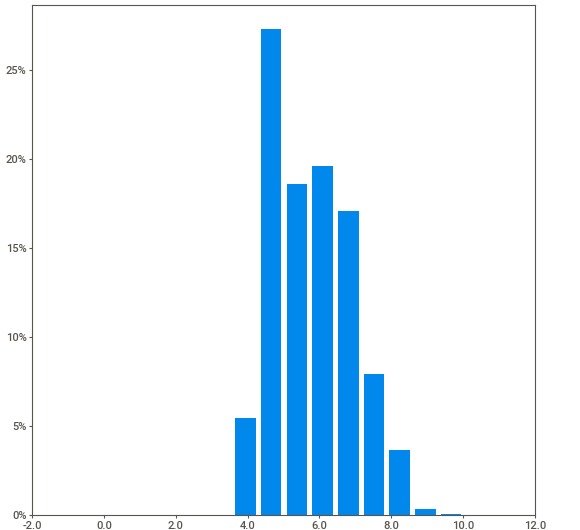
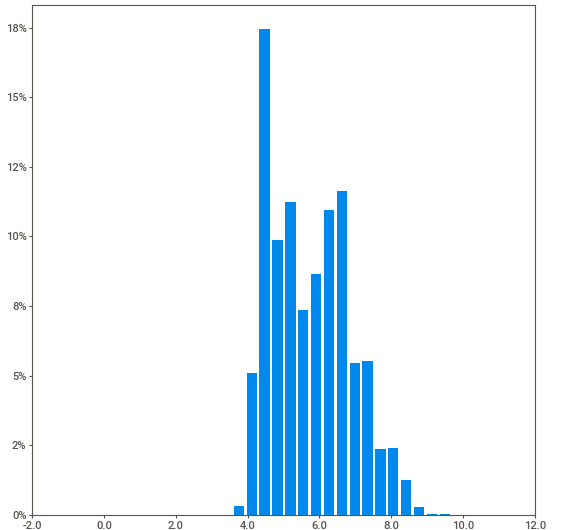
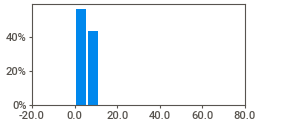
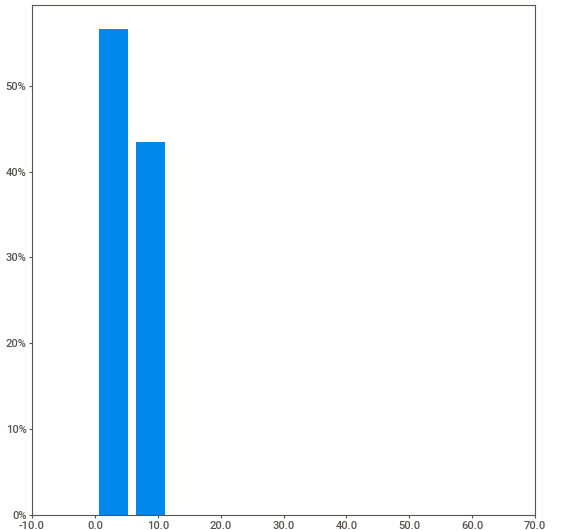
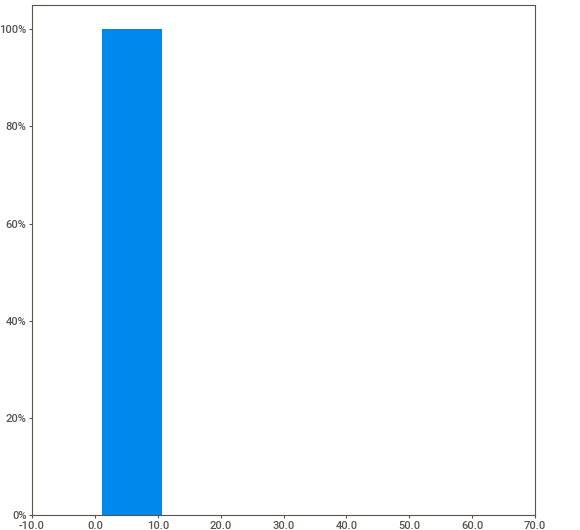
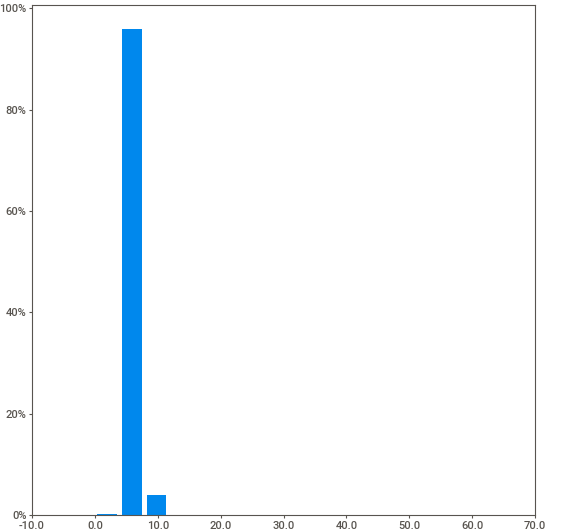
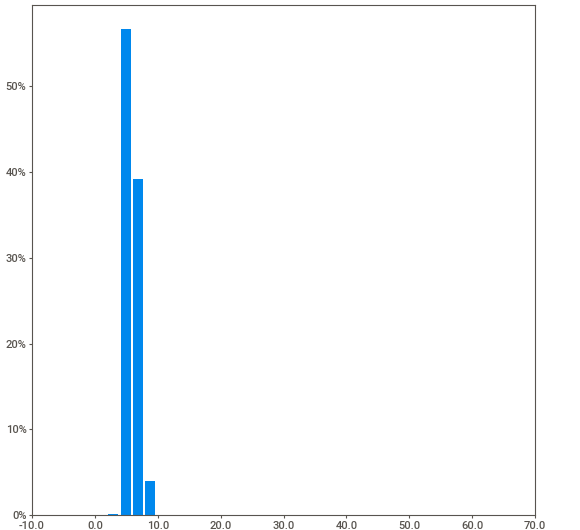
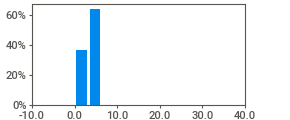
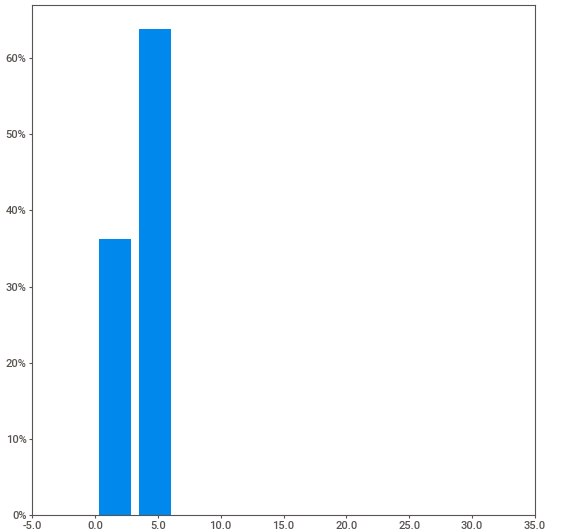
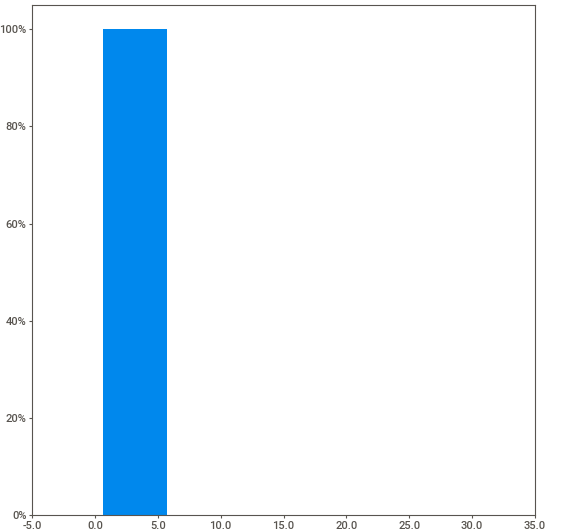
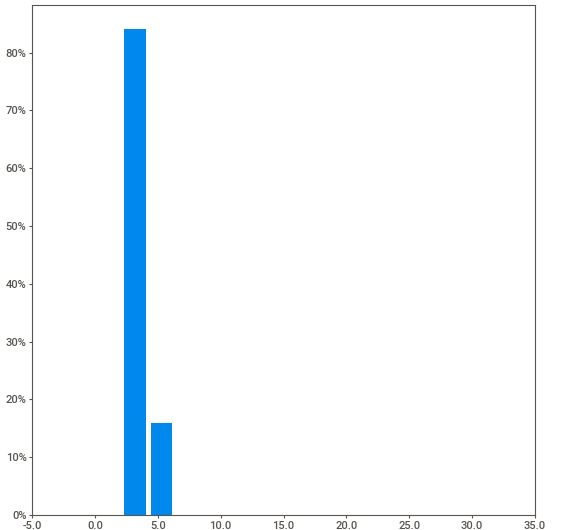
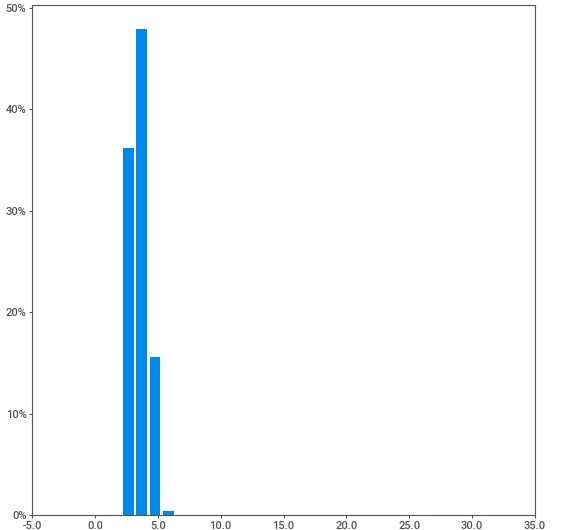
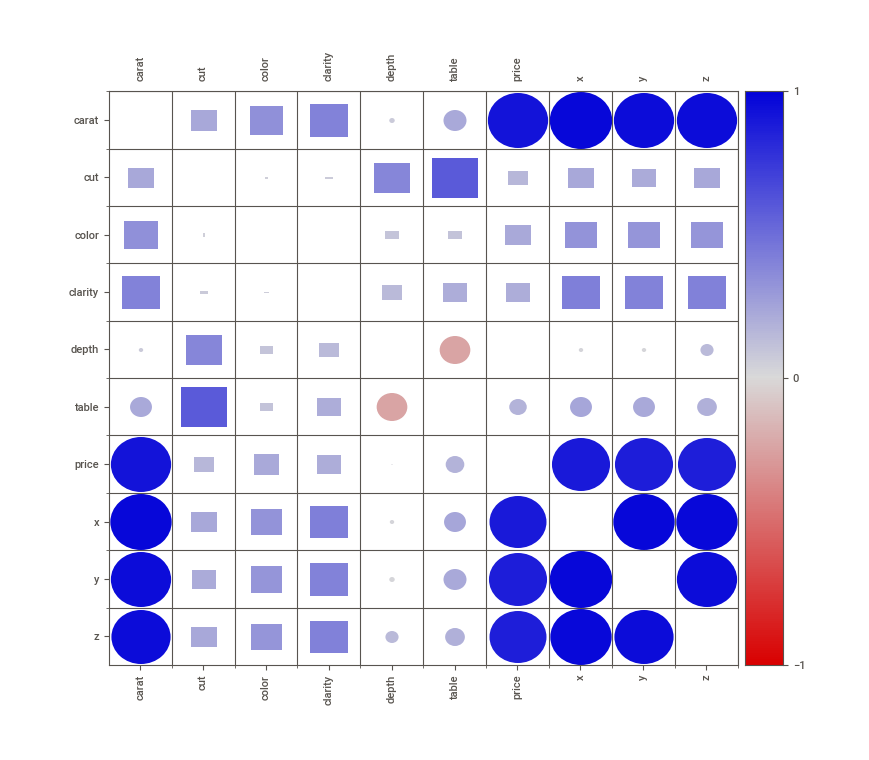
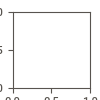

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['price'])
y = np.log10(df[['price']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((43152, 9), (10788, 9))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['cut', 'color', 'clarity'], 
    loss_function="RMSEWithUncertainty",
)

In [8]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.5565905	test: 0.5549993	best: 0.5549993 (0)	total: 57ms	remaining: 56.9s
1:	learn: 0.5195580	test: 0.5180274	best: 0.5180274 (1)	total: 65.8ms	remaining: 32.8s
2:	learn: 0.4869022	test: 0.4854078	best: 0.4854078 (2)	total: 74.9ms	remaining: 24.9s
3:	learn: 0.4578570	test: 0.4565179	best: 0.4565179 (3)	total: 83.2ms	remaining: 20.7s
4:	learn: 0.4297169	test: 0.4283753	best: 0.4283753 (4)	total: 91.7ms	remaining: 18.2s
5:	learn: 0.4033194	test: 0.4020264	best: 0.4020264 (5)	total: 101ms	remaining: 16.7s
6:	learn: 0.3781785	test: 0.3768890	best: 0.3768890 (6)	total: 108ms	remaining: 15.3s
7:	learn: 0.3543520	test: 0.3531102	best: 0.3531102 (7)	total: 116ms	remaining: 14.3s
8:	learn: 0.3310123	test: 0.3297890	best: 0.3297890 (8)	total: 123ms	remaining: 13.5s
9:	learn: 0.3070784	test: 0.3058631	best: 0.3058631 (9)	total: 131ms	remaining: 13s
10:	learn: 0.2837328	test: 0.2825170	best: 0.2825170 (10)	total: 140ms	remaining: 12.6s
11:	learn: 0.2602294	test: 0.2589806	best: 0.258980

119:	learn: -1.3001347	test: -1.3086943	best: -1.3086943 (119)	total: 867ms	remaining: 6.36s
120:	learn: -1.3023347	test: -1.3108994	best: -1.3108994 (120)	total: 870ms	remaining: 6.32s
121:	learn: -1.3076962	test: -1.3164998	best: -1.3164998 (121)	total: 877ms	remaining: 6.31s
122:	learn: -1.3119880	test: -1.3209543	best: -1.3209543 (122)	total: 883ms	remaining: 6.29s
123:	learn: -1.3137155	test: -1.3227197	best: -1.3227197 (123)	total: 886ms	remaining: 6.26s
124:	learn: -1.3184719	test: -1.3276711	best: -1.3276711 (124)	total: 892ms	remaining: 6.24s
125:	learn: -1.3202018	test: -1.3294554	best: -1.3294554 (125)	total: 896ms	remaining: 6.21s
126:	learn: -1.3254261	test: -1.3346729	best: -1.3346729 (126)	total: 902ms	remaining: 6.2s
127:	learn: -1.3308403	test: -1.3402446	best: -1.3402446 (127)	total: 909ms	remaining: 6.19s
128:	learn: -1.3365098	test: -1.3460017	best: -1.3460017 (128)	total: 915ms	remaining: 6.18s
129:	learn: -1.3393266	test: -1.3489304	best: -1.3489304 (129)	total: 9

217:	learn: -1.5268826	test: -1.5368430	best: -1.5368430 (217)	total: 1.47s	remaining: 5.29s
218:	learn: -1.5276684	test: -1.5375229	best: -1.5375229 (218)	total: 1.48s	remaining: 5.28s
219:	learn: -1.5281323	test: -1.5379462	best: -1.5379462 (219)	total: 1.49s	remaining: 5.27s
220:	learn: -1.5288569	test: -1.5384666	best: -1.5384666 (220)	total: 1.49s	remaining: 5.27s
221:	learn: -1.5289294	test: -1.5385478	best: -1.5385478 (221)	total: 1.5s	remaining: 5.25s
222:	learn: -1.5299527	test: -1.5396220	best: -1.5396220 (222)	total: 1.5s	remaining: 5.23s
223:	learn: -1.5304763	test: -1.5400835	best: -1.5400835 (223)	total: 1.51s	remaining: 5.22s
224:	learn: -1.5313337	test: -1.5407880	best: -1.5407880 (224)	total: 1.51s	remaining: 5.22s
225:	learn: -1.5326086	test: -1.5418796	best: -1.5418796 (225)	total: 1.52s	remaining: 5.21s
226:	learn: -1.5336653	test: -1.5430691	best: -1.5430691 (226)	total: 1.53s	remaining: 5.2s
227:	learn: -1.5352192	test: -1.5443718	best: -1.5443718 (227)	total: 1.5

319:	learn: -1.6091018	test: -1.6169091	best: -1.6169091 (319)	total: 2.08s	remaining: 4.42s
320:	learn: -1.6096998	test: -1.6174112	best: -1.6174112 (320)	total: 2.09s	remaining: 4.42s
321:	learn: -1.6101317	test: -1.6177394	best: -1.6177394 (321)	total: 2.09s	remaining: 4.41s
322:	learn: -1.6106873	test: -1.6181596	best: -1.6181596 (322)	total: 2.1s	remaining: 4.41s
323:	learn: -1.6115189	test: -1.6190659	best: -1.6190659 (323)	total: 2.11s	remaining: 4.4s
324:	learn: -1.6118665	test: -1.6193253	best: -1.6193253 (324)	total: 2.12s	remaining: 4.39s
325:	learn: -1.6128406	test: -1.6197947	best: -1.6197947 (325)	total: 2.12s	remaining: 4.39s
326:	learn: -1.6132153	test: -1.6201222	best: -1.6201222 (326)	total: 2.13s	remaining: 4.38s
327:	learn: -1.6135675	test: -1.6202653	best: -1.6202653 (327)	total: 2.14s	remaining: 4.38s
328:	learn: -1.6138135	test: -1.6205093	best: -1.6205093 (328)	total: 2.14s	remaining: 4.37s
329:	learn: -1.6143617	test: -1.6211027	best: -1.6211027 (329)	total: 2.

434:	learn: -1.6809785	test: -1.6743026	best: -1.6743026 (434)	total: 2.89s	remaining: 3.76s
435:	learn: -1.6815287	test: -1.6749979	best: -1.6749979 (435)	total: 2.9s	remaining: 3.75s
436:	learn: -1.6817213	test: -1.6750808	best: -1.6750808 (436)	total: 2.9s	remaining: 3.74s
437:	learn: -1.6819387	test: -1.6751821	best: -1.6751821 (437)	total: 2.91s	remaining: 3.74s
438:	learn: -1.6823136	test: -1.6753375	best: -1.6753375 (438)	total: 2.92s	remaining: 3.73s
439:	learn: -1.6826599	test: -1.6756338	best: -1.6756338 (439)	total: 2.93s	remaining: 3.73s
440:	learn: -1.6829551	test: -1.6758557	best: -1.6758557 (440)	total: 2.93s	remaining: 3.72s
441:	learn: -1.6833759	test: -1.6761944	best: -1.6761944 (441)	total: 2.94s	remaining: 3.71s
442:	learn: -1.6841473	test: -1.6769240	best: -1.6769240 (442)	total: 2.95s	remaining: 3.71s
443:	learn: -1.6843375	test: -1.6770388	best: -1.6770388 (443)	total: 2.95s	remaining: 3.7s
444:	learn: -1.6846999	test: -1.6772579	best: -1.6772579 (444)	total: 2.9

546:	learn: -1.7281042	test: -1.7099597	best: -1.7099742 (545)	total: 3.7s	remaining: 3.06s
547:	learn: -1.7282584	test: -1.7105800	best: -1.7105800 (547)	total: 3.71s	remaining: 3.06s
548:	learn: -1.7287651	test: -1.7109455	best: -1.7109455 (548)	total: 3.71s	remaining: 3.05s
549:	learn: -1.7289217	test: -1.7110381	best: -1.7110381 (549)	total: 3.72s	remaining: 3.04s
550:	learn: -1.7291771	test: -1.7112222	best: -1.7112222 (550)	total: 3.73s	remaining: 3.04s
551:	learn: -1.7295973	test: -1.7121590	best: -1.7121590 (551)	total: 3.73s	remaining: 3.03s
552:	learn: -1.7300461	test: -1.7125596	best: -1.7125596 (552)	total: 3.74s	remaining: 3.02s
553:	learn: -1.7301759	test: -1.7126543	best: -1.7126543 (553)	total: 3.75s	remaining: 3.02s
554:	learn: -1.7304430	test: -1.7127767	best: -1.7127767 (554)	total: 3.75s	remaining: 3.01s
555:	learn: -1.7310289	test: -1.7132214	best: -1.7132214 (555)	total: 3.76s	remaining: 3s
556:	learn: -1.7313665	test: -1.7134260	best: -1.7134260 (556)	total: 3.77

661:	learn: -1.7660627	test: -1.7371911	best: -1.7371911 (661)	total: 4.51s	remaining: 2.3s
662:	learn: -1.7663700	test: -1.7373959	best: -1.7373959 (662)	total: 4.52s	remaining: 2.3s
663:	learn: -1.7666587	test: -1.7375079	best: -1.7375079 (663)	total: 4.53s	remaining: 2.29s
664:	learn: -1.7667929	test: -1.7375683	best: -1.7375683 (664)	total: 4.54s	remaining: 2.29s
665:	learn: -1.7670262	test: -1.7376454	best: -1.7376454 (665)	total: 4.55s	remaining: 2.28s
666:	learn: -1.7673056	test: -1.7378550	best: -1.7378550 (666)	total: 4.55s	remaining: 2.27s
667:	learn: -1.7676247	test: -1.7380239	best: -1.7380239 (667)	total: 4.56s	remaining: 2.27s
668:	learn: -1.7679020	test: -1.7382361	best: -1.7382361 (668)	total: 4.57s	remaining: 2.26s
669:	learn: -1.7681731	test: -1.7383994	best: -1.7383994 (669)	total: 4.58s	remaining: 2.25s
670:	learn: -1.7684031	test: -1.7385634	best: -1.7385634 (670)	total: 4.58s	remaining: 2.25s
671:	learn: -1.7685433	test: -1.7386751	best: -1.7386751 (671)	total: 4.

770:	learn: -1.7850716	test: -1.7459863	best: -1.7459863 (770)	total: 5.32s	remaining: 1.58s
771:	learn: -1.7853292	test: -1.7466556	best: -1.7466556 (771)	total: 5.33s	remaining: 1.57s
772:	learn: -1.7856637	test: -1.7467942	best: -1.7467942 (772)	total: 5.34s	remaining: 1.57s
773:	learn: -1.7859879	test: -1.7471481	best: -1.7471481 (773)	total: 5.35s	remaining: 1.56s
774:	learn: -1.7860719	test: -1.7472072	best: -1.7472072 (774)	total: 5.36s	remaining: 1.55s
775:	learn: -1.7861686	test: -1.7471450	best: -1.7472072 (774)	total: 5.36s	remaining: 1.55s
776:	learn: -1.7862521	test: -1.7469576	best: -1.7472072 (774)	total: 5.37s	remaining: 1.54s
777:	learn: -1.7865253	test: -1.7472508	best: -1.7472508 (777)	total: 5.38s	remaining: 1.53s
778:	learn: -1.7865798	test: -1.7471792	best: -1.7472508 (777)	total: 5.38s	remaining: 1.53s
779:	learn: -1.7867944	test: -1.7474170	best: -1.7474170 (779)	total: 5.39s	remaining: 1.52s
780:	learn: -1.7870533	test: -1.7474775	best: -1.7474775 (780)	total: 

859:	learn: -1.8010664	test: -1.7540317	best: -1.7540317 (859)	total: 5.93s	remaining: 966ms
860:	learn: -1.8011599	test: -1.7540338	best: -1.7540338 (860)	total: 5.94s	remaining: 959ms
861:	learn: -1.8014436	test: -1.7541645	best: -1.7541645 (861)	total: 5.95s	remaining: 952ms
862:	learn: -1.8015118	test: -1.7541007	best: -1.7541645 (861)	total: 5.95s	remaining: 945ms
863:	learn: -1.8016304	test: -1.7541542	best: -1.7541645 (861)	total: 5.96s	remaining: 938ms
864:	learn: -1.8017819	test: -1.7541640	best: -1.7541645 (861)	total: 5.97s	remaining: 931ms
865:	learn: -1.8017923	test: -1.7541586	best: -1.7541645 (861)	total: 5.97s	remaining: 924ms
866:	learn: -1.8018805	test: -1.7541225	best: -1.7541645 (861)	total: 5.98s	remaining: 917ms
867:	learn: -1.8019241	test: -1.7541359	best: -1.7541645 (861)	total: 5.98s	remaining: 910ms
868:	learn: -1.8021230	test: -1.7541682	best: -1.7541682 (868)	total: 5.99s	remaining: 903ms
869:	learn: -1.8023287	test: -1.7542250	best: -1.7542250 (869)	total: 

953:	learn: -1.8124176	test: -1.7575740	best: -1.7576332 (952)	total: 6.54s	remaining: 315ms
954:	learn: -1.8124910	test: -1.7575917	best: -1.7576332 (952)	total: 6.54s	remaining: 308ms
955:	learn: -1.8125583	test: -1.7575806	best: -1.7576332 (952)	total: 6.55s	remaining: 301ms
956:	learn: -1.8125999	test: -1.7576178	best: -1.7576332 (952)	total: 6.55s	remaining: 295ms
957:	learn: -1.8127771	test: -1.7578727	best: -1.7578727 (957)	total: 6.56s	remaining: 288ms
958:	learn: -1.8128730	test: -1.7579595	best: -1.7579595 (958)	total: 6.57s	remaining: 281ms
959:	learn: -1.8128893	test: -1.7579501	best: -1.7579595 (958)	total: 6.58s	remaining: 274ms
960:	learn: -1.8129241	test: -1.7578596	best: -1.7579595 (958)	total: 6.58s	remaining: 267ms
961:	learn: -1.8130324	test: -1.7579408	best: -1.7579595 (958)	total: 6.59s	remaining: 260ms
962:	learn: -1.8131236	test: -1.7580261	best: -1.7580261 (962)	total: 6.59s	remaining: 253ms
963:	learn: -1.8132087	test: -1.7581040	best: -1.7581040 (963)	total: 

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
calculate_nll_catboost(model, x_train, y_train)

-1.8208424646314076

In [11]:
calculate_nll_catboost(model, x_test, y_test)

-1.7752046901650993

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[1, 2, 3], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 100, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=30, batch_size=1024, verbose=True)

0:	learn: 0.5579413	total: 7ms	remaining: 1.39s
1:	learn: 0.5227974	total: 12.5ms	remaining: 1.23s
2:	learn: 0.4911946	total: 17.4ms	remaining: 1.14s
3:	learn: 0.4624084	total: 22.5ms	remaining: 1.1s
4:	learn: 0.4353872	total: 27.2ms	remaining: 1.06s
5:	learn: 0.4100112	total: 32.6ms	remaining: 1.05s
6:	learn: 0.3852236	total: 37.8ms	remaining: 1.04s
7:	learn: 0.3613284	total: 42.2ms	remaining: 1.01s
8:	learn: 0.3385223	total: 47.3ms	remaining: 1s
9:	learn: 0.3171481	total: 52.4ms	remaining: 995ms
10:	learn: 0.2952672	total: 57.5ms	remaining: 988ms
11:	learn: 0.2733442	total: 62.8ms	remaining: 983ms
12:	learn: 0.2523981	total: 68.4ms	remaining: 984ms
13:	learn: 0.2310772	total: 73ms	remaining: 970ms
14:	learn: 0.2105034	total: 78ms	remaining: 963ms
15:	learn: 0.1904924	total: 82.9ms	remaining: 953ms
16:	learn: 0.1697434	total: 87.6ms	remaining: 943ms
17:	learn: 0.1498967	total: 92.8ms	remaining: 939ms
18:	learn: 0.1294843	total: 97.4ms	remaining: 928ms
19:	learn: 0.1094417	total: 102ms

185:	learn: -1.3729500	total: 812ms	remaining: 61.1ms
186:	learn: -1.3766775	total: 817ms	remaining: 56.8ms
187:	learn: -1.3788115	total: 822ms	remaining: 52.4ms
188:	learn: -1.3807965	total: 826ms	remaining: 48.1ms
189:	learn: -1.3831274	total: 831ms	remaining: 43.7ms
190:	learn: -1.3840225	total: 835ms	remaining: 39.3ms
191:	learn: -1.3852516	total: 838ms	remaining: 34.9ms
192:	learn: -1.3875799	total: 843ms	remaining: 30.6ms
193:	learn: -1.3889695	total: 846ms	remaining: 26.2ms
194:	learn: -1.3903934	total: 851ms	remaining: 21.8ms
195:	learn: -1.3938186	total: 855ms	remaining: 17.4ms
196:	learn: -1.3949155	total: 859ms	remaining: 13.1ms
197:	learn: -1.3988189	total: 864ms	remaining: 8.73ms
198:	learn: -1.3998589	total: 869ms	remaining: 4.37ms
199:	learn: -1.4018989	total: 873ms	remaining: 0us
train loss: -1.2750370502471924
val loss: -1.392513632774353
train loss: -1.619056224822998
val loss: -1.68149995803833
train loss: -1.6753959655761719
val loss: -1.7232801914215088
train loss:

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7fe59ef908d0>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7fe59ef90828>)

In [14]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-2.0902

In [15]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-1.9928147

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

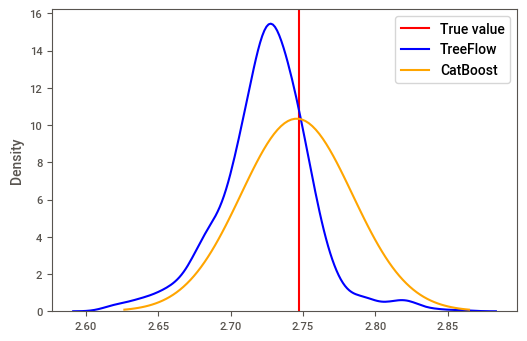

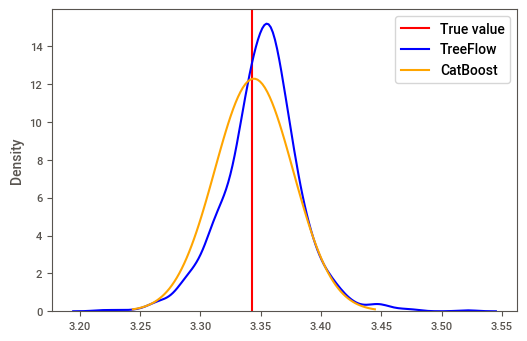

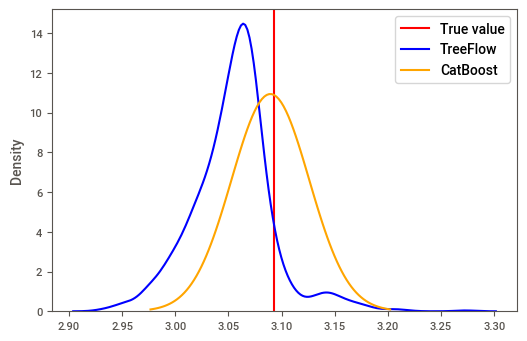

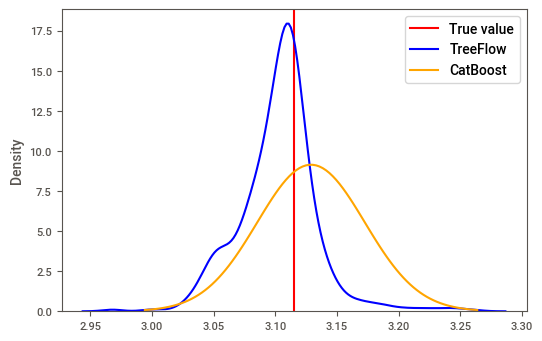

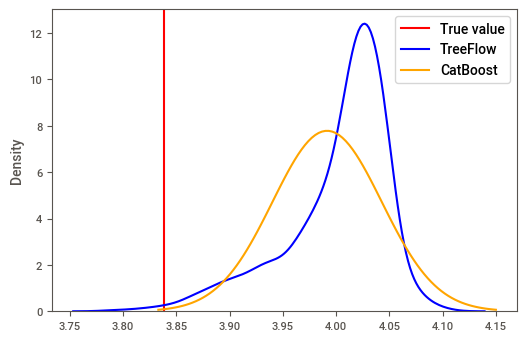

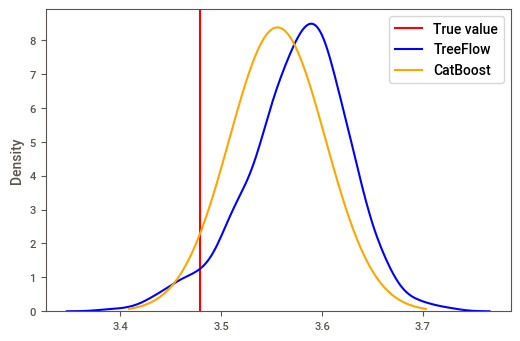

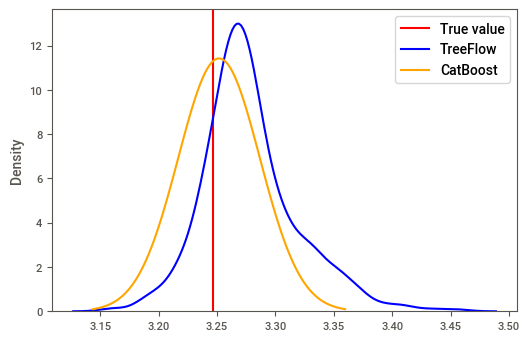

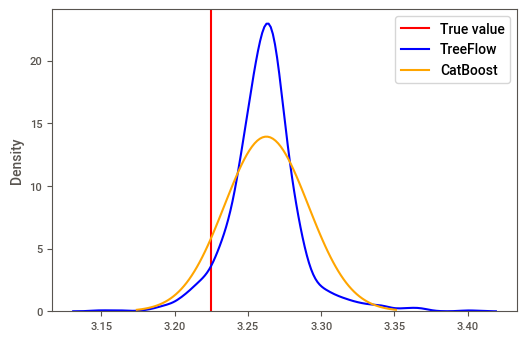

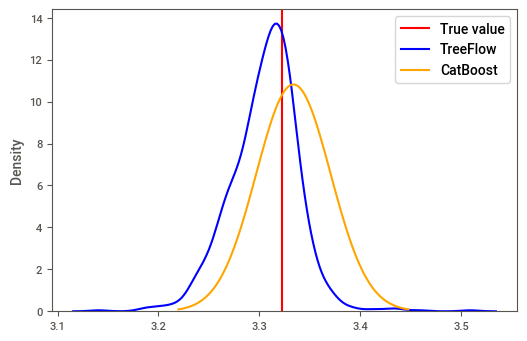

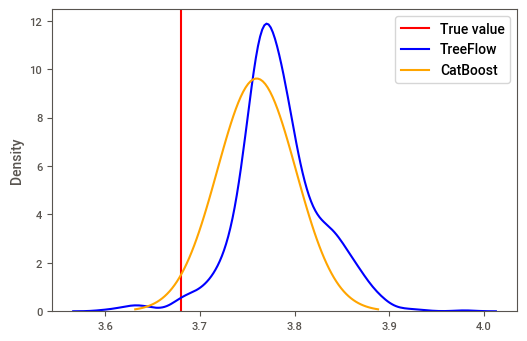

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()